# The limits of LDA

Here, we will explore the limitations of LDA and how some of them can be overcome. To this end, two datasets will be used


In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.qda import QDA

## Preprocess the features
Sometimes, some of the features clearly violate the __linear separability__ assumption made by LDA. Features can be pre-processed by applying a given function to each feature, which yields a Generalized Linear Discriminant analysis:

$$ y = \sum_i^D w_i f_i(\mathbf{x}_i) $$ 

__Task:__ Follow the steps (1) to (4) in the code below.

#### Q2.4.1) Which LDA assumption(s) are violated by the provided dataset?
__Answer__: The dataset violates the gaussianity distribution of the features, as seen by the exponential behavior of feature x2.
#### Q2.4.2) In which way can the feature(s) be preprocessed in order to improve the performance? Implement your solution and upload your results and code to the wiki and Git repository(under wiki/Results Assignment 2/Q 2.4.2 and git_dir/Assignment2/Q2-4.ipynb), together with a short explanation of your approach. Hint: Think of polynomials, trigonometric functions, logarithms, exponential functions, etc.
__Answer__: A first approach can be applying a logarithmic function in order to get rid of the exponential behavior of feature x2.

cov_test 
 [[  2.8407327   10.94773459]
 [ 10.94773459  65.52355693]]
cov 
 [[  2.8231983   10.99931476]
 [ 10.99931476  62.52724688]]
Accuracy:  0.58


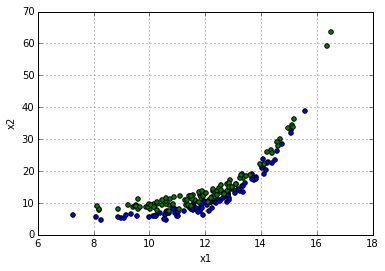

In [2]:
% matplotlib inline
# load data
ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

#print("0 ", idx_c1)

# split into training and validation
#arange generiert Array mit n_samples einträgen, ansteigend von 0, 1, 2, ... also hier einen Index
idx_all = np.arange(n_samples)
#print("idx_all \n", idx_all)
np.random.shuffle(idx_all) #index Liste wird geschüttelt
#idx_tr = index Liste bis zu einer Zahl die 0,7 der geschüttelten Samples entspricht
idx_tr = idx_all[:int(0.7*n_samples)]
#idx_tr = index Liste ab zu 0,7 den geschüttelten Samples
idx_val = idx_all[int(0.7*n_samples):]

#Teile generierte Daten auf in Training und Validation
X_tr = X[idx_tr,:]    # vermischte X Daten, Teil 0-70%
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]

# scatter-plot data with corresponding labels
#print("1 ", idx_c1)
# numpy.where If only condition is given, return the tuple condition.nonzero(), the indices where condition is True.
#print("y_tr: \n", y_tr)
idx_c1 = np.where(y_tr == 0)
#print("0 ", idx_c1)
#idx_c2 = np.where(y_tr == 1)[0]  (unclear, whatfor [0])
idx_c2 = np.where(y_tr == 1)

#print("1 ", idx_c2)
#mathplotlib figure
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

# classify un-processed data LDA() initialises classifier
clf = LinearDiscriminantAnalysis(store_covariance=True)
#clf = LDA(store_covariance=True)
#print(clf)

cov_test=np.cov(X_tr.T)
print("cov_test \n", cov_test)

clf.fit(X_tr, y_tr)  #train
score = clf.score(X_va, y_va)
#print("X_va /n", X_va)
#print("y_va /n", y_va)

cov = clf.covariance_
#print("X_va after /n", X_va)
#print("y_va after /n", y_va)

print("cov \n", cov)
print('Accuracy:  %.2f'%score)



Accuracy:  0.78
score by slcearn method on Test data:  0.81
The hand made Accuracy on the test set is 80.67%


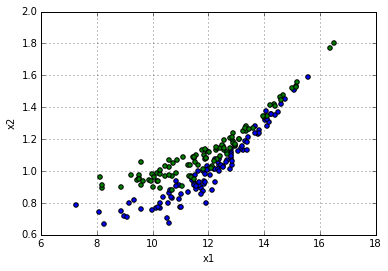

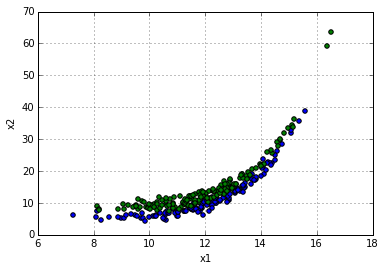

In [3]:
# 2-> Preprocess your features
# 3-> Check the performance of your LDA classifier

# 4-> If you think you got it, upload the predicted labels of the following test data as in Assignment 1.3

# 2nd feature seem to have a quadratic behavior
# maybe applying a logarithm might help
#print("before log. treatment X_tr: \n", X_tr)

X_tr[:,1] = np.log10(X_tr[:,1])
#X_tr[:,1] = np.sqrt(X_tr[:,1])


#--> Array von Zwei Tupeln (x1,x2), je zweiter Eintrag wird viel kleiner 12--> 1,1
#print("after log. treatment X_tr: \n", X_tr) 

X_va[:,1] = np.log10(X_va[:,1])
#X_va[:,1] = np.sqrt(X_va[:,1])

plt.figure() #create the figure
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

# initialise class class sklearn.discriminant_analysis.LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_tr, y_tr)  #training on data
#  compare results on Test Samples with true labels for X
score = clf.score(X_va, y_va)    
print('Accuracy:  %.2f'%score)

# load test data
ds_data = 'data/non-lin_test.data'
#ds_labels ='data/non-lin_test.labels'
X_te = np.loadtxt(ds_data)
y_te = np.loadtxt(ds_labels)
n_samples_te = len(y)

#print("0 ", idx_c1)

# split into training and validation
#arange generiert Array mit n_samples einträgen, ansteigend von 0, 1, 2, ... also hier einen Index
idx_all_te = np.arange(n_samples_te)
#print("idx_all \n", idx_all)
np.random.shuffle(idx_all_te) #index Liste wird geschüttelt

#Teile generierte Daten auf in Training und Validation
X_te = X[idx_all_te,:]    # vermischte X Daten, Teil 0-70%
y_te = y[idx_all_te]

# scatter-plot data with corresponding labels
#print("1 ", idx_c1)
# numpy.where If only condition is given, return the tuple condition.nonzero(), the indices where condition is True.
idx_c1 = np.where(y_te == 0)[0]
#print("0 ", idx_c1)
idx_c2 = np.where(y_te == 1)[0]
#print("1 ", idx_c2)
#mathplotlib figure
plt.figure()
plt.scatter(X_te[idx_c1,0],X_te[idx_c1,1],c='b')
plt.scatter(X_te[idx_c2,0],X_te[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()


X_te[:,1] = np.log10(X_te[:,1])

y_predict = clf.predict(X_te)


score = clf.score(X_te, y_te)    

print('score by slcearn method on Test data:  %.2f'%score)

#print("compare: ", np.array(y_te, dtype=int) == np.array(y_predict, dtype=int))
#sum method of 
print('The hand made Accuracy on the test set is %.2f%%' %(float(sum(np.array(y_te, dtype=int)==np.array(y_predict, dtype=int)))/len(y_te)*100))


#print("y_predict \n", y_predict)
#print("y_te \n", y_te)

fname = 'data/non-lin_test.predictions'
np.savetxt(fname, y_predict, fmt='%d', delimiter=' ', newline='\n')

## Feature extraction
__Tasks:__ 
 1. Visualize the given toy 2D-dataset. 
 2. Train an LDA classifier on the given data. Remember to split your data set into training and validation set. Which performance do you achieve?


There appears to be some exploitable structure in your data, but the LDA is not directly able to capture this.

Create a new feater (column in X) representing the new feature

#### Q2.4.3) In what way can the existing features be combined in order to get a __linearly separable__ dataset? 

__Hint:__ Try to think of it in a 3D way: How would you add another dimension such that the 2 classes can be separated by a plane?

__Answer__: The distance between each point and the center of the distribution acts as a feature that makes the problem linearly separable.

__Tasks__: 
1. Implement your additional feature that combines the existing features. 
2. Calculate the performance of LDA using this additional feature and see if you can improve upon the performance.

Accuracy raw features:  0.47
Accuracy 3D:  0.99


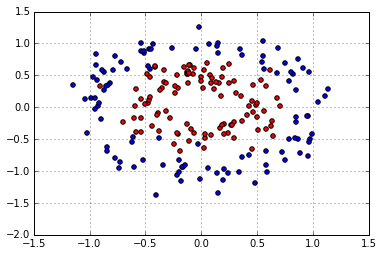

In [4]:
# 1-> Scatter-plot your 2D-data.
# load data
ds_data = 'data/circles_train.data'
ds_labels ='data/circles_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# split into training and validation
idx_all = np.arange(n_samples)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]
X_tr = X[idx_tr,:]
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]

# scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='r')
plt.grid()

# classify original data
clf = LinearDiscriminantAnalysis()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy raw features:  %.2f'%score)

# 2-> Combine the 2 existing features so a LDA classifier works
# compute new features
#print("len(X_tr) \n", len(X_tr))
#print("X_tr \n", X_tr)
#norm = np.linalg.norm(X_tr,axis=1) 
#eindimensionaler Vektor, der zu jeder Zeile ("axis=1") die euklidische Länge von (x,y) zurückgibt
#print("len(norm) \n", len(norm))
#print("np.linalg.norm(X_tr,axis=1) \n", norm)

feat_new_original = np.atleast_2d(np.linalg.norm(X_tr,axis=1)).T

#äquivalent handmade: nimmt der Reihe nach in der ersten Dimension von X_tr (Zeilen) alle, 
#in der zweiten Dimension die ausgewählten Features 
feat_new = np.atleast_2d(np.sqrt(X_tr[:,0] * X_tr[:,0]+X_tr[:,1] * X_tr[:,1])).T
#print(feat_new)
#1_dim Vektor wird mit np.atleast_2d aufgeblasen zu Array von Arrays, um später an X_tr appenden zu können
# Frobenius Norm by default = euklidische Norm
#print("feat_new \n", feat_new)
#print("feat_new_own \n", feat_new_own)
#axis=1 heißt nicht zeilen, sondern spalten
#print ("feat_new",feat_new)
#print ("X_tr",X_tr)
X_tr = np.append(X_tr,feat_new,axis=1)
feat_new = np.atleast_2d(np.linalg.norm(X_va,axis=1)).T    # dito mit validation data
X_va = np.append(X_va,feat_new,axis=1)
#print("X_tr \n", X_tr)
clf = LinearDiscriminantAnalysis()
clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy 3D:  %.2f' % score)

#params = clf.get_params()
#print(params)

#Decision function values related to each class, per sample. 
#In the two-class case, the shape is [n_samples,], giving the log likelihood ratio of the positive class.
lda_decision_array = clf.decision_function(X_tr)
#print(X_tr)

#print(lda_decision_array)

y_predict = clf.predict(X_tr)
#print(y_predict)

#predict immer 0, wenn decision array <0, sonst 1

## What else can go wrong?

__Task:__ Visualize the data set.

#### Q2.4.4) What LDA assumption(s) are violated by the next dataset?. What would be an optimal decision boundary? Bonus: Find out which method would provide an optimal decision boundary. 

__Hint:__ It is slightly more general than the LDA algorithm.

__Answer:__ The dataset violates the assumption of equal covariance matrix for both classes. In this case, the use of Quadratic Discriminant Analysis QDA provides an optimal decision boundary because it drops the assumption of equal covariance matrices for both classes.

Accuracy LDA:  0.900
Accuracy QDA:  0.967


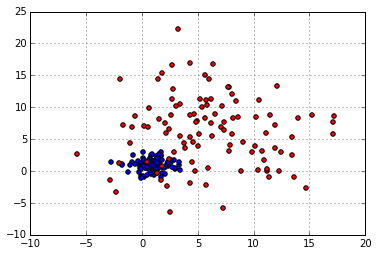

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis import QDA
ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

# 1-> Scatter-plot your 2D-data.
# 2-> What is the optimal decision boundary?

# load data
ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)
n_samples = len(y)

# split into training and validation
idx_all = np.arange(n_samples)
np.random.shuffle(idx_all)
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]
X_tr = X[idx_tr,:]  # hier ein : dran, weil X_tr mehrdimensional, und weitere Dimensionen (hier nur eine) unangetastet bleiben sollen
y_tr = y[idx_tr]
X_va = X[idx_val,:]
y_va = y[idx_val]


# scatter-plot data with corresponding labels
idx_c1 = np.where(y_tr == 0)[0]
idx_c2 = np.where(y_tr == 1)[0]
plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='r')
plt.grid()

# classify un-processed data
clf = LinearDiscriminantAnalysis()

clf.fit(X_tr, y_tr)
score = clf.score(X_va, y_va)
print('Accuracy LDA:  %.3f' % score)

cqf = QuadraticDiscriminantAnalysis()
cqf.fit(X_tr, y_tr)
score = cqf.score(X_va, y_va)
print('Accuracy QDA:  %.3f' % score)

In [64]:
#2x4 Matrix eine Zeile dazu
arr = np.append([[1, 2, 3, 4], [4, 5, 6, 4]], [[7, 8, 9, 1]], axis=0)
arr

arr = np.append(arr,arr, axis=0)
arr

arr = np.append(arr,arr, axis=1)
arr

'''
index = [ 1., 2., 2., 1.]
result = np.where(index == 2)[0]
print(result[0])

#result = np.where(index == 2)[0]
#result

print(result)


#np.append([[1, 2, 3, 4], [4, 5, 6, 4]], 1, axis=1)'''

xind = np.array([1.1, 1.2, 1.3])
yind = np.array([2.1, 2.2, 2.3])

cond = np.array([True, False, True])

result = np.where(cond,xind,yind)
result

xind = np.array([1, 1, 1])
yind = np.array([2, 3, 4])

cond = np.array([True, False, True])

result = np.where(cond,xind,yind)
result

result = np.where(cond)[0]
result



array([0, 2])